In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 64.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [8]:
# Spanish corpus of 127 texts from ECHR (automatic translations) with projected annotations (reviewed and non-reviewed)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-all-train.tsv', column_delimiter=' ',
                                    dev_file='ES-all-dev.tsv',
                                    test_file='ES-all-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 10:04:21,421 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 10:04:21,422 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-train.tsv
2024-01-23 10:04:21,423 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-dev.tsv
2024-01-23 10:04:21,424 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3881,
        "number_of_documents_per_class": {
            "CODE": 191,
            "PER": 771,
            "DATETIME": 1931,
            "LOC": 368,
            "ORG": 480,
            "DEM": 162,
            "MISC": 154,
            "QUANTITY": 117
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 108232,
            "min": 1,
            "max": 556,
            "avg": 27.887657820149446
        }
    },
    "TEST": {
        "dataset

In [9]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-01-23 10:07:26,346 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [10]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 10:07:27,034 Computing label dictionary. Progress:


3881it [00:00, 54453.26it/s]

2024-01-23 10:07:27,111 Dictionary created for label 'ner' with 9 values: DATETIME (seen 1931 times), PER (seen 771 times), ORG (seen 480 times), LOC (seen 368 times), CODE (seen 191 times), DEM (seen 162 times), MISC (seen 154 times), QUANTITY (seen 117 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'CODE', b'DEM', b'MISC', b'QUANTITY']


In [11]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [12]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 10:07:27,129 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY


In [13]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [14]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=23,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 10:08:31,916 ----------------------------------------------------------------------------------------------------
2024-01-23 10:08:31,917 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

2024-01-23 10:09:33,218 Evaluating as a multi-label problem: False
2024-01-23 10:09:33,238 DEV : loss 0.27608585357666016 - f1-score (micro avg)  0.545
2024-01-23 10:09:33,297 BAD EPOCHS (no improvement): 0


2024-01-23 10:09:33,302 saving best model
2024-01-23 10:09:38,889 ----------------------------------------------------------------------------------------------------
2024-01-23 10:09:41,239 epoch 2 - iter 12/122 - loss 0.30823705 - time (sec): 2.35 - samples/sec: 4590.51 - lr: 0.100000
2024-01-23 10:09:44,553 epoch 2 - iter 24/122 - loss 0.27741477 - time (sec): 5.66 - samples/sec: 3844.41 - lr: 0.100000
2024-01-23 10:09:47,752 epoch 2 - iter 36/122 - loss 0.27365583 - time (sec): 8.86 - samples/sec: 3628.42 - lr: 0.100000
2024-01-23 10:09:51,184 epoch 2 - iter 48/122 - loss 0.27105105 - time (sec): 12.29 - samples/sec: 3425.86 - lr: 0.100000
2024-01-23 10:09:54,770 epoch 2 - iter 60/122 - loss 0.26490261 - time (sec): 15.88 - samples/sec: 3339.27 - lr: 0.100000
2024-01-23 10:09:58,375 epoch 2 - iter 72/122 - loss 0.25054160 - time (sec): 19.48 - samples/sec: 3266.85 - lr: 0.100000
2024-01-23 10:10:01,856 epoch 2 - iter 84/122 - loss 0.25152727 - time (sec): 22.96 - samples/sec: 3221.

100%|██████████| 16/16 [00:04<00:00,  3.69it/s]

2024-01-23 10:10:18,743 Evaluating as a multi-label problem: False
2024-01-23 10:10:18,760 DEV : loss 0.18730813264846802 - f1-score (micro avg)  0.5717
2024-01-23 10:10:18,818 BAD EPOCHS (no improvement): 0
2024-01-23 10:10:18,823 saving best model


2024-01-23 10:10:24,396 ----------------------------------------------------------------------------------------------------
2024-01-23 10:10:26,809 epoch 3 - iter 12/122 - loss 0.17095350 - time (sec): 2.41 - samples/sec: 4537.79 - lr: 0.100000
2024-01-23 10:10:30,771 epoch 3 - iter 24/122 - loss 0.19943327 - time (sec): 6.37 - samples/sec: 3438.25 - lr: 0.100000
2024-01-23 10:10:34,058 epoch 3 - iter 36/122 - loss 0.19559372 - time (sec): 9.66 - samples/sec: 3289.23 - lr: 0.100000
2024-01-23 10:10:38,390 epoch 3 - iter 48/122 - loss 0.25133758 - time (sec): 13.99 - samples/sec: 3084.36 - lr: 0.100000
2024-01-23 10:10:41,990 epoch 3 - iter 60/122 - loss 0.23391214 - time (sec): 17.59 - samples/sec: 3083.52 - lr: 0.100000
2024-01-23 10:10:45,462 epoch 3 - iter 72/122 - loss 0.22247905 - time (sec): 21.06 - samples/sec: 3088.94 - lr: 0.100000
2024-01-23 10:10:49,258 epoch 3 - iter 84/122 - loss 0.21736274 - time (sec): 24.86 - samples/sec: 3051.94 - lr: 0.100000
2024-01-23 10:10:53,366 

100%|██████████| 16/16 [00:04<00:00,  3.67it/s]

2024-01-23 10:11:05,203 Evaluating as a multi-label problem: False
2024-01-23 10:11:05,219 DEV : loss 0.11534278839826584 - f1-score (micro avg)  0.7862
2024-01-23 10:11:05,279 BAD EPOCHS (no improvement): 0
2024-01-23 10:11:05,284 saving best model


2024-01-23 10:11:11,419 ----------------------------------------------------------------------------------------------------
2024-01-23 10:11:13,646 epoch 4 - iter 12/122 - loss 0.15931968 - time (sec): 2.23 - samples/sec: 4667.10 - lr: 0.100000
2024-01-23 10:11:18,028 epoch 4 - iter 24/122 - loss 0.18132151 - time (sec): 6.61 - samples/sec: 3182.18 - lr: 0.100000
2024-01-23 10:11:21,529 epoch 4 - iter 36/122 - loss 0.16678226 - time (sec): 10.11 - samples/sec: 3084.93 - lr: 0.100000
2024-01-23 10:11:24,896 epoch 4 - iter 48/122 - loss 0.16077827 - time (sec): 13.48 - samples/sec: 3098.95 - lr: 0.100000
2024-01-23 10:11:29,382 epoch 4 - iter 60/122 - loss 0.20013951 - time (sec): 17.96 - samples/sec: 2943.26 - lr: 0.100000
2024-01-23 10:11:33,125 epoch 4 - iter 72/122 - loss 0.18872822 - time (sec): 21.70 - samples/sec: 2925.92 - lr: 0.100000
2024-01-23 10:11:36,608 epoch 4 - iter 84/122 - loss 0.18543639 - time (sec): 25.19 - samples/sec: 2931.81 - lr: 0.100000
2024-01-23 10:11:40,174

100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

2024-01-23 10:11:52,592 Evaluating as a multi-label problem: False
2024-01-23 10:11:52,610 DEV : loss 0.11735273152589798 - f1-score (micro avg)  0.7278
2024-01-23 10:11:52,671 BAD EPOCHS (no improvement): 1
2024-01-23 10:11:52,676 ----------------------------------------------------------------------------------------------------


2024-01-23 10:11:55,097 epoch 5 - iter 12/122 - loss 0.16377011 - time (sec): 2.42 - samples/sec: 4401.26 - lr: 0.100000
2024-01-23 10:11:58,946 epoch 5 - iter 24/122 - loss 0.22012640 - time (sec): 6.27 - samples/sec: 3492.01 - lr: 0.100000
2024-01-23 10:12:02,828 epoch 5 - iter 36/122 - loss 0.18841688 - time (sec): 10.15 - samples/sec: 3207.10 - lr: 0.100000
2024-01-23 10:12:05,946 epoch 5 - iter 48/122 - loss 0.17718541 - time (sec): 13.27 - samples/sec: 3209.00 - lr: 0.100000
2024-01-23 10:12:09,371 epoch 5 - iter 60/122 - loss 0.17338881 - time (sec): 16.69 - samples/sec: 3222.43 - lr: 0.100000
2024-01-23 10:12:12,567 epoch 5 - iter 72/122 - loss 0.16707383 - time (sec): 19.89 - samples/sec: 3235.84 - lr: 0.100000
2024-01-23 10:12:15,867 epoch 5 - iter 84/122 - loss 0.16129685 - time (sec): 23.19 - samples/sec: 3255.58 - lr: 0.100000
2024-01-23 10:12:19,080 epoch 5 - iter 96/122 - loss 0.16160948 - time (sec): 26.40 - samples/sec: 3273.71 - lr: 0.100000
2024-01-23 10:12:22,189 ep

100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

2024-01-23 10:12:30,970 Evaluating as a multi-label problem: False
2024-01-23 10:12:30,985 DEV : loss 0.10101434588432312 - f1-score (micro avg)  0.7519
2024-01-23 10:12:31,046 BAD EPOCHS (no improvement): 2
2024-01-23 10:12:31,052 ----------------------------------------------------------------------------------------------------


2024-01-23 10:12:33,480 epoch 6 - iter 12/122 - loss 0.14937264 - time (sec): 2.43 - samples/sec: 4603.88 - lr: 0.100000
2024-01-23 10:12:36,808 epoch 6 - iter 24/122 - loss 0.14973071 - time (sec): 5.75 - samples/sec: 3821.76 - lr: 0.100000
2024-01-23 10:12:39,986 epoch 6 - iter 36/122 - loss 0.13986481 - time (sec): 8.93 - samples/sec: 3611.50 - lr: 0.100000
2024-01-23 10:12:43,264 epoch 6 - iter 48/122 - loss 0.13388575 - time (sec): 12.21 - samples/sec: 3493.10 - lr: 0.100000
2024-01-23 10:12:46,520 epoch 6 - iter 60/122 - loss 0.13521622 - time (sec): 15.47 - samples/sec: 3437.02 - lr: 0.100000
2024-01-23 10:12:49,789 epoch 6 - iter 72/122 - loss 0.13277004 - time (sec): 18.74 - samples/sec: 3429.74 - lr: 0.100000
2024-01-23 10:12:53,081 epoch 6 - iter 84/122 - loss 0.13301241 - time (sec): 22.03 - samples/sec: 3408.57 - lr: 0.100000
2024-01-23 10:12:56,330 epoch 6 - iter 96/122 - loss 0.13256827 - time (sec): 25.28 - samples/sec: 3361.64 - lr: 0.100000
2024-01-23 10:12:59,669 epo

100%|██████████| 16/16 [00:04<00:00,  3.25it/s]

2024-01-23 10:13:09,958 Evaluating as a multi-label problem: False
2024-01-23 10:13:09,974 DEV : loss 0.09592024236917496 - f1-score (micro avg)  0.8194
2024-01-23 10:13:10,035 BAD EPOCHS (no improvement): 0
2024-01-23 10:13:10,041 saving best model


2024-01-23 10:13:15,722 ----------------------------------------------------------------------------------------------------
2024-01-23 10:13:17,949 epoch 7 - iter 12/122 - loss 0.12838167 - time (sec): 2.23 - samples/sec: 4793.87 - lr: 0.100000
2024-01-23 10:13:21,849 epoch 7 - iter 24/122 - loss 0.12481274 - time (sec): 6.13 - samples/sec: 3580.22 - lr: 0.100000
2024-01-23 10:13:25,192 epoch 7 - iter 36/122 - loss 0.13301739 - time (sec): 9.47 - samples/sec: 3398.07 - lr: 0.100000
2024-01-23 10:13:28,722 epoch 7 - iter 48/122 - loss 0.12385949 - time (sec): 13.00 - samples/sec: 3316.66 - lr: 0.100000
2024-01-23 10:13:32,017 epoch 7 - iter 60/122 - loss 0.12193511 - time (sec): 16.29 - samples/sec: 3269.62 - lr: 0.100000
2024-01-23 10:13:35,446 epoch 7 - iter 72/122 - loss 0.12231476 - time (sec): 19.72 - samples/sec: 3231.13 - lr: 0.100000
2024-01-23 10:13:38,866 epoch 7 - iter 84/122 - loss 0.12063124 - time (sec): 23.14 - samples/sec: 3216.52 - lr: 0.100000
2024-01-23 10:13:43,050 

100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

2024-01-23 10:13:55,905 Evaluating as a multi-label problem: False
2024-01-23 10:13:55,921 DEV : loss 0.07956654578447342 - f1-score (micro avg)  0.8344
2024-01-23 10:13:55,980 BAD EPOCHS (no improvement): 0
2024-01-23 10:13:55,985 saving best model


2024-01-23 10:14:01,591 ----------------------------------------------------------------------------------------------------
2024-01-23 10:14:04,088 epoch 8 - iter 12/122 - loss 0.09149632 - time (sec): 2.49 - samples/sec: 4402.72 - lr: 0.100000
2024-01-23 10:14:07,428 epoch 8 - iter 24/122 - loss 0.09881950 - time (sec): 5.84 - samples/sec: 3654.28 - lr: 0.100000
2024-01-23 10:14:11,129 epoch 8 - iter 36/122 - loss 0.10202557 - time (sec): 9.54 - samples/sec: 3381.15 - lr: 0.100000
2024-01-23 10:14:14,810 epoch 8 - iter 48/122 - loss 0.10757442 - time (sec): 13.22 - samples/sec: 3235.00 - lr: 0.100000
2024-01-23 10:14:18,679 epoch 8 - iter 60/122 - loss 0.10961681 - time (sec): 17.09 - samples/sec: 3108.88 - lr: 0.100000
2024-01-23 10:14:22,273 epoch 8 - iter 72/122 - loss 0.11016514 - time (sec): 20.68 - samples/sec: 3071.48 - lr: 0.100000
2024-01-23 10:14:26,602 epoch 8 - iter 84/122 - loss 0.12024844 - time (sec): 25.01 - samples/sec: 3004.04 - lr: 0.100000
2024-01-23 10:14:30,326 

100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

2024-01-23 10:14:42,882 Evaluating as a multi-label problem: False
2024-01-23 10:14:42,900 DEV : loss 0.07606089860200882 - f1-score (micro avg)  0.8149
2024-01-23 10:14:42,967 BAD EPOCHS (no improvement): 1
2024-01-23 10:14:42,973 ----------------------------------------------------------------------------------------------------


2024-01-23 10:14:45,144 epoch 9 - iter 12/122 - loss 0.10469783 - time (sec): 2.17 - samples/sec: 4654.58 - lr: 0.100000
2024-01-23 10:14:48,252 epoch 9 - iter 24/122 - loss 0.11259287 - time (sec): 5.28 - samples/sec: 3854.64 - lr: 0.100000
2024-01-23 10:14:51,422 epoch 9 - iter 36/122 - loss 0.11206395 - time (sec): 8.45 - samples/sec: 3617.97 - lr: 0.100000
2024-01-23 10:14:54,697 epoch 9 - iter 48/122 - loss 0.10721167 - time (sec): 11.72 - samples/sec: 3521.97 - lr: 0.100000
2024-01-23 10:14:58,127 epoch 9 - iter 60/122 - loss 0.10173608 - time (sec): 15.15 - samples/sec: 3449.77 - lr: 0.100000
2024-01-23 10:15:01,422 epoch 9 - iter 72/122 - loss 0.10453890 - time (sec): 18.45 - samples/sec: 3453.15 - lr: 0.100000
2024-01-23 10:15:04,866 epoch 9 - iter 84/122 - loss 0.10128504 - time (sec): 21.89 - samples/sec: 3414.44 - lr: 0.100000
2024-01-23 10:15:08,754 epoch 9 - iter 96/122 - loss 0.10525626 - time (sec): 25.78 - samples/sec: 3331.06 - lr: 0.100000
2024-01-23 10:15:12,022 epo

100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

2024-01-23 10:15:21,045 Evaluating as a multi-label problem: False
2024-01-23 10:15:21,061 DEV : loss 0.09542032331228256 - f1-score (micro avg)  0.7576
2024-01-23 10:15:21,124 BAD EPOCHS (no improvement): 2
2024-01-23 10:15:21,130 ----------------------------------------------------------------------------------------------------


2024-01-23 10:15:23,263 epoch 10 - iter 12/122 - loss 0.10132021 - time (sec): 2.13 - samples/sec: 4949.54 - lr: 0.100000
2024-01-23 10:15:26,684 epoch 10 - iter 24/122 - loss 0.10720165 - time (sec): 5.55 - samples/sec: 3803.29 - lr: 0.100000
2024-01-23 10:15:30,077 epoch 10 - iter 36/122 - loss 0.10300285 - time (sec): 8.95 - samples/sec: 3540.86 - lr: 0.100000
2024-01-23 10:15:33,600 epoch 10 - iter 48/122 - loss 0.10372595 - time (sec): 12.47 - samples/sec: 3393.84 - lr: 0.100000
2024-01-23 10:15:36,950 epoch 10 - iter 60/122 - loss 0.09999776 - time (sec): 15.82 - samples/sec: 3375.10 - lr: 0.100000
2024-01-23 10:15:40,230 epoch 10 - iter 72/122 - loss 0.10098684 - time (sec): 19.10 - samples/sec: 3365.62 - lr: 0.100000
2024-01-23 10:15:43,525 epoch 10 - iter 84/122 - loss 0.09756968 - time (sec): 22.39 - samples/sec: 3352.16 - lr: 0.100000
2024-01-23 10:15:47,565 epoch 10 - iter 96/122 - loss 0.10213016 - time (sec): 26.43 - samples/sec: 3261.22 - lr: 0.100000
2024-01-23 10:15:50

100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

2024-01-23 10:16:00,437 Evaluating as a multi-label problem: False
2024-01-23 10:16:00,453 DEV : loss 0.07489094883203506 - f1-score (micro avg)  0.7972
2024-01-23 10:16:00,512 BAD EPOCHS (no improvement): 3
2024-01-23 10:16:00,518 ----------------------------------------------------------------------------------------------------


2024-01-23 10:16:03,142 epoch 11 - iter 12/122 - loss 0.09723185 - time (sec): 2.62 - samples/sec: 4258.04 - lr: 0.100000
2024-01-23 10:16:07,385 epoch 11 - iter 24/122 - loss 0.11118958 - time (sec): 6.87 - samples/sec: 3380.35 - lr: 0.100000
2024-01-23 10:16:10,799 epoch 11 - iter 36/122 - loss 0.10371528 - time (sec): 10.28 - samples/sec: 3297.82 - lr: 0.100000
2024-01-23 10:16:13,796 epoch 11 - iter 48/122 - loss 0.09729994 - time (sec): 13.28 - samples/sec: 3290.09 - lr: 0.100000
2024-01-23 10:16:17,032 epoch 11 - iter 60/122 - loss 0.09755056 - time (sec): 16.51 - samples/sec: 3301.42 - lr: 0.100000
2024-01-23 10:16:20,233 epoch 11 - iter 72/122 - loss 0.09623887 - time (sec): 19.71 - samples/sec: 3294.17 - lr: 0.100000
2024-01-23 10:16:23,387 epoch 11 - iter 84/122 - loss 0.09604784 - time (sec): 22.87 - samples/sec: 3273.52 - lr: 0.100000
2024-01-23 10:16:26,544 epoch 11 - iter 96/122 - loss 0.09670408 - time (sec): 26.02 - samples/sec: 3288.22 - lr: 0.100000
2024-01-23 10:16:2

100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

2024-01-23 10:16:38,670 Evaluating as a multi-label problem: False
2024-01-23 10:16:38,688 DEV : loss 0.06617330759763718 - f1-score (micro avg)  0.8248
2024-01-23 10:16:38,749 Epoch    11: reducing learning rate of group 0 to 5.0000e-02.
2024-01-23 10:16:38,751 BAD EPOCHS (no improvement): 4
2024-01-23 10:16:38,757 ----------------------------------------------------------------------------------------------------


2024-01-23 10:16:41,835 epoch 12 - iter 12/122 - loss 0.12589644 - time (sec): 3.08 - samples/sec: 3873.63 - lr: 0.050000
2024-01-23 10:16:44,997 epoch 12 - iter 24/122 - loss 0.10548661 - time (sec): 6.24 - samples/sec: 3540.27 - lr: 0.050000
2024-01-23 10:16:48,381 epoch 12 - iter 36/122 - loss 0.09748995 - time (sec): 9.62 - samples/sec: 3404.02 - lr: 0.050000
2024-01-23 10:16:51,494 epoch 12 - iter 48/122 - loss 0.09212928 - time (sec): 12.74 - samples/sec: 3414.18 - lr: 0.050000
2024-01-23 10:16:54,576 epoch 12 - iter 60/122 - loss 0.08949538 - time (sec): 15.82 - samples/sec: 3398.48 - lr: 0.050000
2024-01-23 10:16:57,887 epoch 12 - iter 72/122 - loss 0.09004124 - time (sec): 19.13 - samples/sec: 3372.32 - lr: 0.050000
2024-01-23 10:17:01,529 epoch 12 - iter 84/122 - loss 0.08939213 - time (sec): 22.77 - samples/sec: 3319.72 - lr: 0.050000
2024-01-23 10:17:04,778 epoch 12 - iter 96/122 - loss 0.08692666 - time (sec): 26.02 - samples/sec: 3307.74 - lr: 0.050000
2024-01-23 10:17:08

100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

2024-01-23 10:17:17,596 Evaluating as a multi-label problem: False
2024-01-23 10:17:17,613 DEV : loss 0.0621526837348938 - f1-score (micro avg)  0.8208
2024-01-23 10:17:17,672 BAD EPOCHS (no improvement): 1
2024-01-23 10:17:17,678 ----------------------------------------------------------------------------------------------------


2024-01-23 10:17:19,781 epoch 13 - iter 12/122 - loss 0.07588734 - time (sec): 2.10 - samples/sec: 4692.15 - lr: 0.050000
2024-01-23 10:17:22,893 epoch 13 - iter 24/122 - loss 0.07233395 - time (sec): 5.21 - samples/sec: 3827.32 - lr: 0.050000
2024-01-23 10:17:26,498 epoch 13 - iter 36/122 - loss 0.07579757 - time (sec): 8.82 - samples/sec: 3543.14 - lr: 0.050000
2024-01-23 10:17:29,890 epoch 13 - iter 48/122 - loss 0.07271710 - time (sec): 12.21 - samples/sec: 3460.11 - lr: 0.050000
2024-01-23 10:17:33,193 epoch 13 - iter 60/122 - loss 0.07337705 - time (sec): 15.51 - samples/sec: 3440.73 - lr: 0.050000
2024-01-23 10:17:36,472 epoch 13 - iter 72/122 - loss 0.07143196 - time (sec): 18.79 - samples/sec: 3410.66 - lr: 0.050000
2024-01-23 10:17:39,727 epoch 13 - iter 84/122 - loss 0.07329006 - time (sec): 22.05 - samples/sec: 3387.54 - lr: 0.050000
2024-01-23 10:17:42,977 epoch 13 - iter 96/122 - loss 0.07180060 - time (sec): 25.30 - samples/sec: 3377.29 - lr: 0.050000
2024-01-23 10:17:46

100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

2024-01-23 10:17:55,773 Evaluating as a multi-label problem: False
2024-01-23 10:17:55,790 DEV : loss 0.06355880200862885 - f1-score (micro avg)  0.8196
2024-01-23 10:17:55,851 BAD EPOCHS (no improvement): 2
2024-01-23 10:17:55,856 ----------------------------------------------------------------------------------------------------


2024-01-23 10:17:57,996 epoch 14 - iter 12/122 - loss 0.07235066 - time (sec): 2.14 - samples/sec: 4763.87 - lr: 0.050000
2024-01-23 10:18:01,189 epoch 14 - iter 24/122 - loss 0.07163559 - time (sec): 5.33 - samples/sec: 3776.40 - lr: 0.050000
2024-01-23 10:18:04,663 epoch 14 - iter 36/122 - loss 0.07175588 - time (sec): 8.81 - samples/sec: 3516.59 - lr: 0.050000
2024-01-23 10:18:07,900 epoch 14 - iter 48/122 - loss 0.07069732 - time (sec): 12.04 - samples/sec: 3446.25 - lr: 0.050000
2024-01-23 10:18:11,214 epoch 14 - iter 60/122 - loss 0.07301772 - time (sec): 15.36 - samples/sec: 3413.04 - lr: 0.050000
2024-01-23 10:18:14,619 epoch 14 - iter 72/122 - loss 0.07320884 - time (sec): 18.76 - samples/sec: 3365.53 - lr: 0.050000
2024-01-23 10:18:17,897 epoch 14 - iter 84/122 - loss 0.07189786 - time (sec): 22.04 - samples/sec: 3342.21 - lr: 0.050000
2024-01-23 10:18:21,352 epoch 14 - iter 96/122 - loss 0.07163730 - time (sec): 25.49 - samples/sec: 3317.75 - lr: 0.050000
2024-01-23 10:18:24

100%|██████████| 16/16 [00:05<00:00,  3.20it/s]

2024-01-23 10:18:35,077 Evaluating as a multi-label problem: False
2024-01-23 10:18:35,095 DEV : loss 0.06702853739261627 - f1-score (micro avg)  0.8162
2024-01-23 10:18:35,156 BAD EPOCHS (no improvement): 3
2024-01-23 10:18:35,161 ----------------------------------------------------------------------------------------------------


2024-01-23 10:18:37,455 epoch 15 - iter 12/122 - loss 0.06173024 - time (sec): 2.29 - samples/sec: 4638.98 - lr: 0.050000
2024-01-23 10:18:41,218 epoch 15 - iter 24/122 - loss 0.09867733 - time (sec): 6.05 - samples/sec: 3588.34 - lr: 0.050000
2024-01-23 10:18:44,798 epoch 15 - iter 36/122 - loss 0.09476962 - time (sec): 9.64 - samples/sec: 3368.08 - lr: 0.050000
2024-01-23 10:18:48,144 epoch 15 - iter 48/122 - loss 0.08898572 - time (sec): 12.98 - samples/sec: 3314.69 - lr: 0.050000
2024-01-23 10:18:51,273 epoch 15 - iter 60/122 - loss 0.08645779 - time (sec): 16.11 - samples/sec: 3301.56 - lr: 0.050000
2024-01-23 10:18:54,567 epoch 15 - iter 72/122 - loss 0.08235181 - time (sec): 19.40 - samples/sec: 3282.55 - lr: 0.050000
2024-01-23 10:18:57,956 epoch 15 - iter 84/122 - loss 0.08257210 - time (sec): 22.79 - samples/sec: 3288.72 - lr: 0.050000
2024-01-23 10:19:01,144 epoch 15 - iter 96/122 - loss 0.07992303 - time (sec): 25.98 - samples/sec: 3290.89 - lr: 0.050000
2024-01-23 10:19:04

100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

2024-01-23 10:19:13,698 Evaluating as a multi-label problem: False
2024-01-23 10:19:13,715 DEV : loss 0.069438137114048 - f1-score (micro avg)  0.8104
2024-01-23 10:19:13,779 Epoch    15: reducing learning rate of group 0 to 2.5000e-02.
2024-01-23 10:19:13,781 BAD EPOCHS (no improvement): 4
2024-01-23 10:19:13,785 ----------------------------------------------------------------------------------------------------


2024-01-23 10:19:16,168 epoch 16 - iter 12/122 - loss 0.07844730 - time (sec): 2.38 - samples/sec: 4647.45 - lr: 0.025000
2024-01-23 10:19:19,400 epoch 16 - iter 24/122 - loss 0.07134136 - time (sec): 5.61 - samples/sec: 3789.80 - lr: 0.025000
2024-01-23 10:19:22,680 epoch 16 - iter 36/122 - loss 0.07196760 - time (sec): 8.89 - samples/sec: 3594.80 - lr: 0.025000
2024-01-23 10:19:26,057 epoch 16 - iter 48/122 - loss 0.07165901 - time (sec): 12.27 - samples/sec: 3496.37 - lr: 0.025000
2024-01-23 10:19:29,516 epoch 16 - iter 60/122 - loss 0.06926347 - time (sec): 15.73 - samples/sec: 3419.96 - lr: 0.025000
2024-01-23 10:19:33,570 epoch 16 - iter 72/122 - loss 0.07290898 - time (sec): 19.78 - samples/sec: 3285.41 - lr: 0.025000
2024-01-23 10:19:36,936 epoch 16 - iter 84/122 - loss 0.07199455 - time (sec): 23.15 - samples/sec: 3260.17 - lr: 0.025000
2024-01-23 10:19:40,251 epoch 16 - iter 96/122 - loss 0.07244509 - time (sec): 26.46 - samples/sec: 3255.07 - lr: 0.025000
2024-01-23 10:19:43

100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

2024-01-23 10:19:53,174 Evaluating as a multi-label problem: False
2024-01-23 10:19:53,191 DEV : loss 0.058356039226055145 - f1-score (micro avg)  0.8205
2024-01-23 10:19:53,256 BAD EPOCHS (no improvement): 1
2024-01-23 10:19:53,262 ----------------------------------------------------------------------------------------------------


2024-01-23 10:19:56,329 epoch 17 - iter 12/122 - loss 0.08982839 - time (sec): 3.07 - samples/sec: 3702.63 - lr: 0.025000
2024-01-23 10:19:59,376 epoch 17 - iter 24/122 - loss 0.07522102 - time (sec): 6.11 - samples/sec: 3523.96 - lr: 0.025000
2024-01-23 10:20:02,686 epoch 17 - iter 36/122 - loss 0.07135006 - time (sec): 9.42 - samples/sec: 3466.42 - lr: 0.025000
2024-01-23 10:20:05,884 epoch 17 - iter 48/122 - loss 0.07155948 - time (sec): 12.62 - samples/sec: 3415.58 - lr: 0.025000
2024-01-23 10:20:09,027 epoch 17 - iter 60/122 - loss 0.06938257 - time (sec): 15.76 - samples/sec: 3393.77 - lr: 0.025000
2024-01-23 10:20:12,197 epoch 17 - iter 72/122 - loss 0.06799248 - time (sec): 18.93 - samples/sec: 3383.33 - lr: 0.025000
2024-01-23 10:20:15,524 epoch 17 - iter 84/122 - loss 0.06784472 - time (sec): 22.26 - samples/sec: 3365.22 - lr: 0.025000
2024-01-23 10:20:18,885 epoch 17 - iter 96/122 - loss 0.06894913 - time (sec): 25.62 - samples/sec: 3335.37 - lr: 0.025000
2024-01-23 10:20:22

100%|██████████| 16/16 [00:04<00:00,  3.69it/s]

2024-01-23 10:20:30,767 Evaluating as a multi-label problem: False
2024-01-23 10:20:30,783 DEV : loss 0.05676420405507088 - f1-score (micro avg)  0.8157
2024-01-23 10:20:30,847 BAD EPOCHS (no improvement): 2
2024-01-23 10:20:30,852 ----------------------------------------------------------------------------------------------------


2024-01-23 10:20:33,151 epoch 18 - iter 12/122 - loss 0.08080939 - time (sec): 2.30 - samples/sec: 4666.91 - lr: 0.025000
2024-01-23 10:20:36,366 epoch 18 - iter 24/122 - loss 0.07211375 - time (sec): 5.51 - samples/sec: 3841.49 - lr: 0.025000
2024-01-23 10:20:40,420 epoch 18 - iter 36/122 - loss 0.07728754 - time (sec): 9.57 - samples/sec: 3368.85 - lr: 0.025000
2024-01-23 10:20:43,732 epoch 18 - iter 48/122 - loss 0.07278979 - time (sec): 12.88 - samples/sec: 3324.91 - lr: 0.025000
2024-01-23 10:20:46,845 epoch 18 - iter 60/122 - loss 0.06962624 - time (sec): 15.99 - samples/sec: 3342.29 - lr: 0.025000
2024-01-23 10:20:50,966 epoch 18 - iter 72/122 - loss 0.07081820 - time (sec): 20.11 - samples/sec: 3190.19 - lr: 0.025000
2024-01-23 10:20:54,230 epoch 18 - iter 84/122 - loss 0.07050164 - time (sec): 23.38 - samples/sec: 3194.97 - lr: 0.025000
2024-01-23 10:20:57,474 epoch 18 - iter 96/122 - loss 0.06805224 - time (sec): 26.62 - samples/sec: 3218.87 - lr: 0.025000
2024-01-23 10:21:00

100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

2024-01-23 10:21:09,539 Evaluating as a multi-label problem: False
2024-01-23 10:21:09,556 DEV : loss 0.05629318207502365 - f1-score (micro avg)  0.82
2024-01-23 10:21:09,616 BAD EPOCHS (no improvement): 3
2024-01-23 10:21:09,621 ----------------------------------------------------------------------------------------------------


2024-01-23 10:21:11,932 epoch 19 - iter 12/122 - loss 0.06041273 - time (sec): 2.31 - samples/sec: 4694.07 - lr: 0.025000
2024-01-23 10:21:15,358 epoch 19 - iter 24/122 - loss 0.06323281 - time (sec): 5.74 - samples/sec: 3761.39 - lr: 0.025000
2024-01-23 10:21:18,531 epoch 19 - iter 36/122 - loss 0.06486846 - time (sec): 8.91 - samples/sec: 3598.81 - lr: 0.025000
2024-01-23 10:21:22,561 epoch 19 - iter 48/122 - loss 0.07061407 - time (sec): 12.94 - samples/sec: 3347.06 - lr: 0.025000
2024-01-23 10:21:25,701 epoch 19 - iter 60/122 - loss 0.07127699 - time (sec): 16.08 - samples/sec: 3323.47 - lr: 0.025000
2024-01-23 10:21:28,874 epoch 19 - iter 72/122 - loss 0.07009090 - time (sec): 19.25 - samples/sec: 3312.70 - lr: 0.025000
2024-01-23 10:21:32,212 epoch 19 - iter 84/122 - loss 0.06991482 - time (sec): 22.59 - samples/sec: 3289.38 - lr: 0.025000
2024-01-23 10:21:35,574 epoch 19 - iter 96/122 - loss 0.06913731 - time (sec): 25.95 - samples/sec: 3291.97 - lr: 0.025000
2024-01-23 10:21:38

100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

2024-01-23 10:21:47,864 Evaluating as a multi-label problem: False
2024-01-23 10:21:47,880 DEV : loss 0.059130847454071045 - f1-score (micro avg)  0.8285
2024-01-23 10:21:47,949 Epoch    19: reducing learning rate of group 0 to 1.2500e-02.
2024-01-23 10:21:47,950 BAD EPOCHS (no improvement): 4
2024-01-23 10:21:47,956 ----------------------------------------------------------------------------------------------------


2024-01-23 10:21:50,930 epoch 20 - iter 12/122 - loss 0.06150355 - time (sec): 2.97 - samples/sec: 3576.36 - lr: 0.012500
2024-01-23 10:21:54,131 epoch 20 - iter 24/122 - loss 0.06063121 - time (sec): 6.17 - samples/sec: 3343.96 - lr: 0.012500
2024-01-23 10:21:57,442 epoch 20 - iter 36/122 - loss 0.05569562 - time (sec): 9.48 - samples/sec: 3300.33 - lr: 0.012500
2024-01-23 10:22:00,887 epoch 20 - iter 48/122 - loss 0.05769698 - time (sec): 12.93 - samples/sec: 3285.97 - lr: 0.012500
2024-01-23 10:22:04,857 epoch 20 - iter 60/122 - loss 0.06144297 - time (sec): 16.90 - samples/sec: 3159.38 - lr: 0.012500
2024-01-23 10:22:08,100 epoch 20 - iter 72/122 - loss 0.06328711 - time (sec): 20.14 - samples/sec: 3182.01 - lr: 0.012500
2024-01-23 10:22:11,311 epoch 20 - iter 84/122 - loss 0.06256796 - time (sec): 23.35 - samples/sec: 3212.98 - lr: 0.012500
2024-01-23 10:22:14,535 epoch 20 - iter 96/122 - loss 0.06280482 - time (sec): 26.58 - samples/sec: 3224.39 - lr: 0.012500
2024-01-23 10:22:17

100%|██████████| 16/16 [00:04<00:00,  3.73it/s]

2024-01-23 10:22:26,678 Evaluating as a multi-label problem: False
2024-01-23 10:22:26,694 DEV : loss 0.054134175181388855 - f1-score (micro avg)  0.8253
2024-01-23 10:22:26,752 BAD EPOCHS (no improvement): 1
2024-01-23 10:22:26,757 ----------------------------------------------------------------------------------------------------


2024-01-23 10:22:29,003 epoch 21 - iter 12/122 - loss 0.06728087 - time (sec): 2.24 - samples/sec: 4664.06 - lr: 0.012500
2024-01-23 10:22:32,091 epoch 21 - iter 24/122 - loss 0.06070865 - time (sec): 5.33 - samples/sec: 3906.40 - lr: 0.012500
2024-01-23 10:22:35,280 epoch 21 - iter 36/122 - loss 0.05847392 - time (sec): 8.52 - samples/sec: 3683.92 - lr: 0.012500
2024-01-23 10:22:38,454 epoch 21 - iter 48/122 - loss 0.05923793 - time (sec): 11.69 - samples/sec: 3555.71 - lr: 0.012500
2024-01-23 10:22:41,651 epoch 21 - iter 60/122 - loss 0.05794749 - time (sec): 14.89 - samples/sec: 3507.23 - lr: 0.012500
2024-01-23 10:22:44,929 epoch 21 - iter 72/122 - loss 0.05883883 - time (sec): 18.17 - samples/sec: 3472.62 - lr: 0.012500
2024-01-23 10:22:48,070 epoch 21 - iter 84/122 - loss 0.05977151 - time (sec): 21.31 - samples/sec: 3445.80 - lr: 0.012500
2024-01-23 10:22:52,040 epoch 21 - iter 96/122 - loss 0.06430722 - time (sec): 25.28 - samples/sec: 3331.88 - lr: 0.012500
2024-01-23 10:22:55

100%|██████████| 16/16 [00:04<00:00,  3.22it/s]

2024-01-23 10:23:05,272 Evaluating as a multi-label problem: False
2024-01-23 10:23:05,288 DEV : loss 0.05467701703310013 - f1-score (micro avg)  0.8207
2024-01-23 10:23:05,350 BAD EPOCHS (no improvement): 2
2024-01-23 10:23:05,355 ----------------------------------------------------------------------------------------------------


2024-01-23 10:23:07,734 epoch 22 - iter 12/122 - loss 0.05386043 - time (sec): 2.38 - samples/sec: 4638.90 - lr: 0.012500
2024-01-23 10:23:10,831 epoch 22 - iter 24/122 - loss 0.05036873 - time (sec): 5.47 - samples/sec: 3921.81 - lr: 0.012500
2024-01-23 10:23:14,726 epoch 22 - iter 36/122 - loss 0.06016002 - time (sec): 9.37 - samples/sec: 3519.61 - lr: 0.012500
2024-01-23 10:23:17,901 epoch 22 - iter 48/122 - loss 0.06100562 - time (sec): 12.54 - samples/sec: 3482.24 - lr: 0.012500
2024-01-23 10:23:21,142 epoch 22 - iter 60/122 - loss 0.06083814 - time (sec): 15.78 - samples/sec: 3451.43 - lr: 0.012500
2024-01-23 10:23:24,298 epoch 22 - iter 72/122 - loss 0.06061250 - time (sec): 18.94 - samples/sec: 3392.77 - lr: 0.012500
2024-01-23 10:23:27,768 epoch 22 - iter 84/122 - loss 0.06194933 - time (sec): 22.41 - samples/sec: 3365.84 - lr: 0.012500
2024-01-23 10:23:30,921 epoch 22 - iter 96/122 - loss 0.06230302 - time (sec): 25.56 - samples/sec: 3365.60 - lr: 0.012500
2024-01-23 10:23:34

100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

2024-01-23 10:23:43,088 Evaluating as a multi-label problem: False
2024-01-23 10:23:43,104 DEV : loss 0.05362359434366226 - f1-score (micro avg)  0.8232
2024-01-23 10:23:43,162 BAD EPOCHS (no improvement): 3
2024-01-23 10:23:43,167 ----------------------------------------------------------------------------------------------------


2024-01-23 10:23:45,396 epoch 23 - iter 12/122 - loss 0.06637094 - time (sec): 2.23 - samples/sec: 4749.17 - lr: 0.012500
2024-01-23 10:23:48,660 epoch 23 - iter 24/122 - loss 0.06217090 - time (sec): 5.49 - samples/sec: 3822.99 - lr: 0.012500
2024-01-23 10:23:51,881 epoch 23 - iter 36/122 - loss 0.05921881 - time (sec): 8.71 - samples/sec: 3587.44 - lr: 0.012500
2024-01-23 10:23:55,132 epoch 23 - iter 48/122 - loss 0.05685796 - time (sec): 11.96 - samples/sec: 3556.16 - lr: 0.012500
2024-01-23 10:23:58,467 epoch 23 - iter 60/122 - loss 0.05609259 - time (sec): 15.30 - samples/sec: 3474.21 - lr: 0.012500
2024-01-23 10:24:01,838 epoch 23 - iter 72/122 - loss 0.05544229 - time (sec): 18.67 - samples/sec: 3422.91 - lr: 0.012500
2024-01-23 10:24:05,371 epoch 23 - iter 84/122 - loss 0.05572467 - time (sec): 22.20 - samples/sec: 3366.07 - lr: 0.012500
2024-01-23 10:24:08,504 epoch 23 - iter 96/122 - loss 0.05719254 - time (sec): 25.34 - samples/sec: 3359.74 - lr: 0.012500
2024-01-23 10:24:11

100%|██████████| 16/16 [00:04<00:00,  3.24it/s]

2024-01-23 10:24:21,914 Evaluating as a multi-label problem: False
2024-01-23 10:24:21,929 DEV : loss 0.05388123169541359 - f1-score (micro avg)  0.8142
2024-01-23 10:24:21,990 Epoch    23: reducing learning rate of group 0 to 6.2500e-03.
2024-01-23 10:24:21,992 BAD EPOCHS (no improvement): 4


2024-01-23 10:24:27,336 ----------------------------------------------------------------------------------------------------
2024-01-23 10:24:32,720 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, <START>, <STOP>


100%|██████████| 15/15 [00:04<00:00,  3.75it/s]

2024-01-23 10:24:37,428 Evaluating as a multi-label problem: False
2024-01-23 10:24:37,446 0.8095	0.68	0.7391	0.5896
2024-01-23 10:24:37,448 
Results:
- F-score (micro) 0.7391
- F-score (macro) 0.4384
- Accuracy 0.5896

By class:
              precision    recall  f1-score   support

    DATETIME     0.8670    0.9130    0.8894       207
         PER     0.8182    0.7570    0.7864       107
         ORG     0.6111    0.2037    0.3056        54
         LOC     0.6000    0.3750    0.4615        32
    QUANTITY     0.2727    0.2000    0.2308        15
        CODE     0.8333    0.8333    0.8333        12
         DEM     0.0000    0.0000    0.0000        14
        MISC     0.0000    0.0000    0.0000         9

   micro avg     0.8095    0.6800    0.7391       450
   macro avg     0.5003    0.4103    0.4384       450
weighted avg     0.7407    0.6800    0.6955       450

2024-01-23 10:24:37,450 -----------------------------------------------------------------------------------------------

{'test_score': 0.7391304347826089,
 'dev_score_history': [0.5449804432855281,
  0.5716862037871957,
  0.786235662148071,
  0.7278350515463917,
  0.7519125683060109,
  0.8194444444444445,
  0.8343558282208589,
  0.8148893360160966,
  0.7576374745417515,
  0.7972166998011929,
  0.8248248248248247,
  0.8208208208208209,
  0.819607843137255,
  0.816247582205029,
  0.8104448742746616,
  0.8205128205128206,
  0.815686274509804,
  0.8199608610567515,
  0.8284600389863548,
  0.8252714708785784,
  0.8207171314741036,
  0.8231768231768232,
  0.8142292490118577],
 'train_loss_history': [0.5603293597156311,
  0.26316716086089953,
  0.21071391458459893,
  0.17672146502456818,
  0.1555835814951476,
  0.13924064469871433,
  0.12787517361792838,
  0.11933620119316896,
  0.10737919460265333,
  0.10053030365506793,
  0.096903533450568,
  0.086571475673351,
  0.08047461892118897,
  0.07828365802165718,
  0.07832022994080425,
  0.0729948911286923,
  0.06768151437710197,
  0.06568805943554702,
  0.06627912

2024-01-23 10:24:37,473 ----------------------------------------------------------------------------------------------------
2024-01-23 10:24:37,474 WARNING: No LOSS found for test split in this data.
2024-01-23 10:24:37,475 Are you sure you want to plot LOSS and not another value?
2024-01-23 10:24:37,476 ----------------------------------------------------------------------------------------------------
2024-01-23 10:24:37,502 ----------------------------------------------------------------------------------------------------
2024-01-23 10:24:37,503 WARNING: No F1 found for test split in this data.
2024-01-23 10:24:37,504 Are you sure you want to plot F1 and not another value?
2024-01-23 10:24:37,505 ----------------------------------------------------------------------------------------------------
2024-01-23 10:24:38,536 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-ES-all-model/training.png


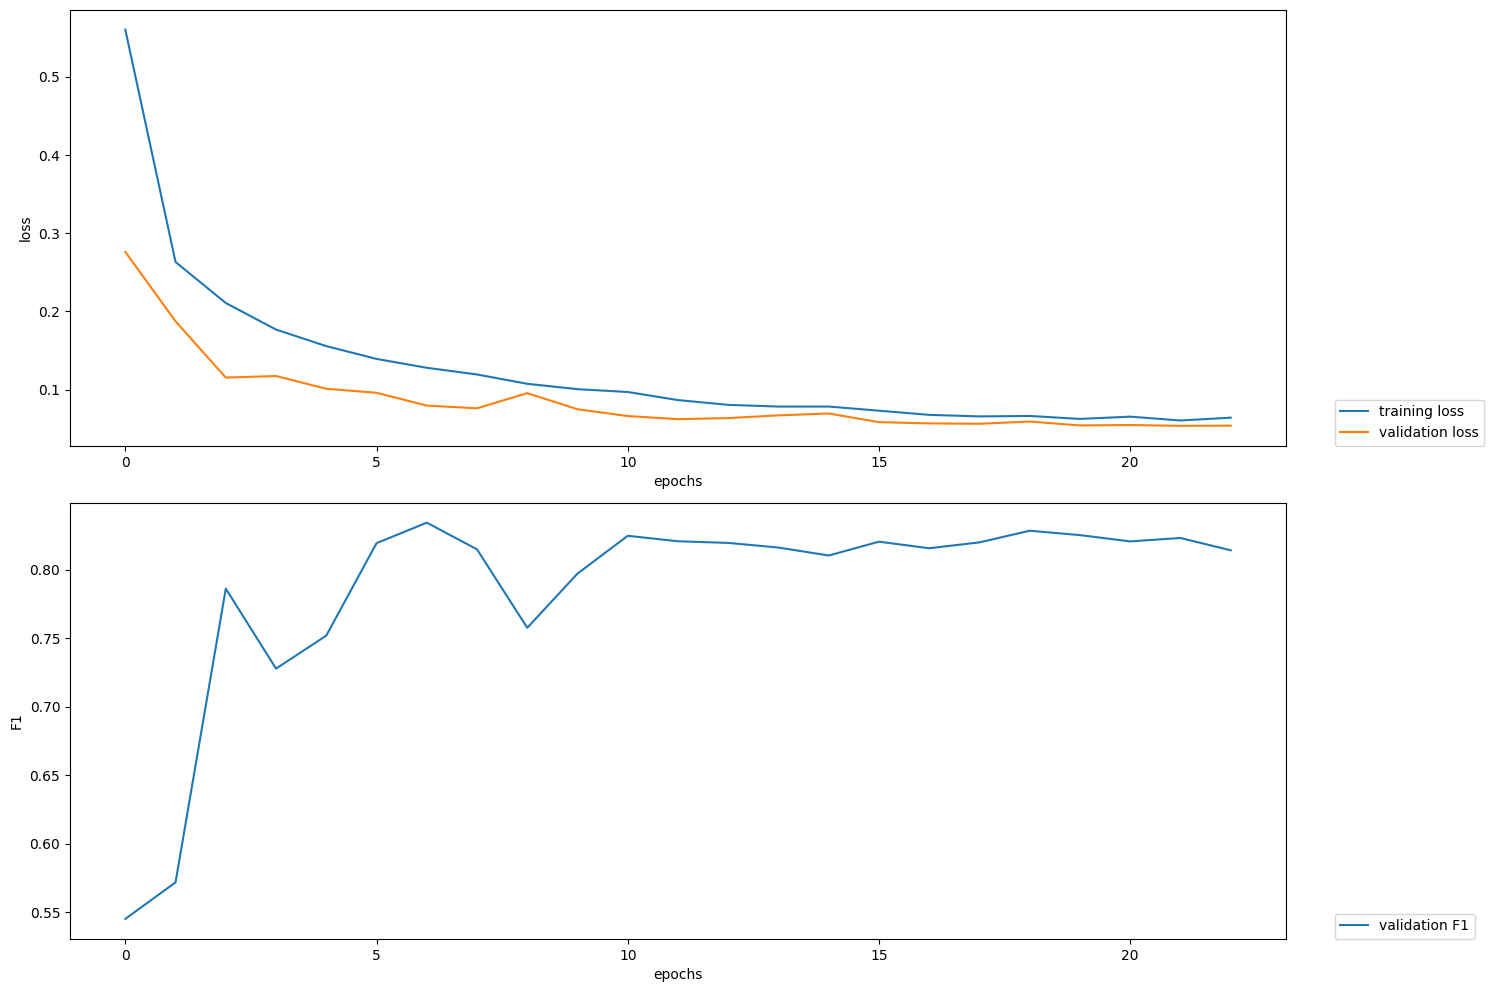

2024-01-23 10:24:41,922 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-ES-all-model/weights.png


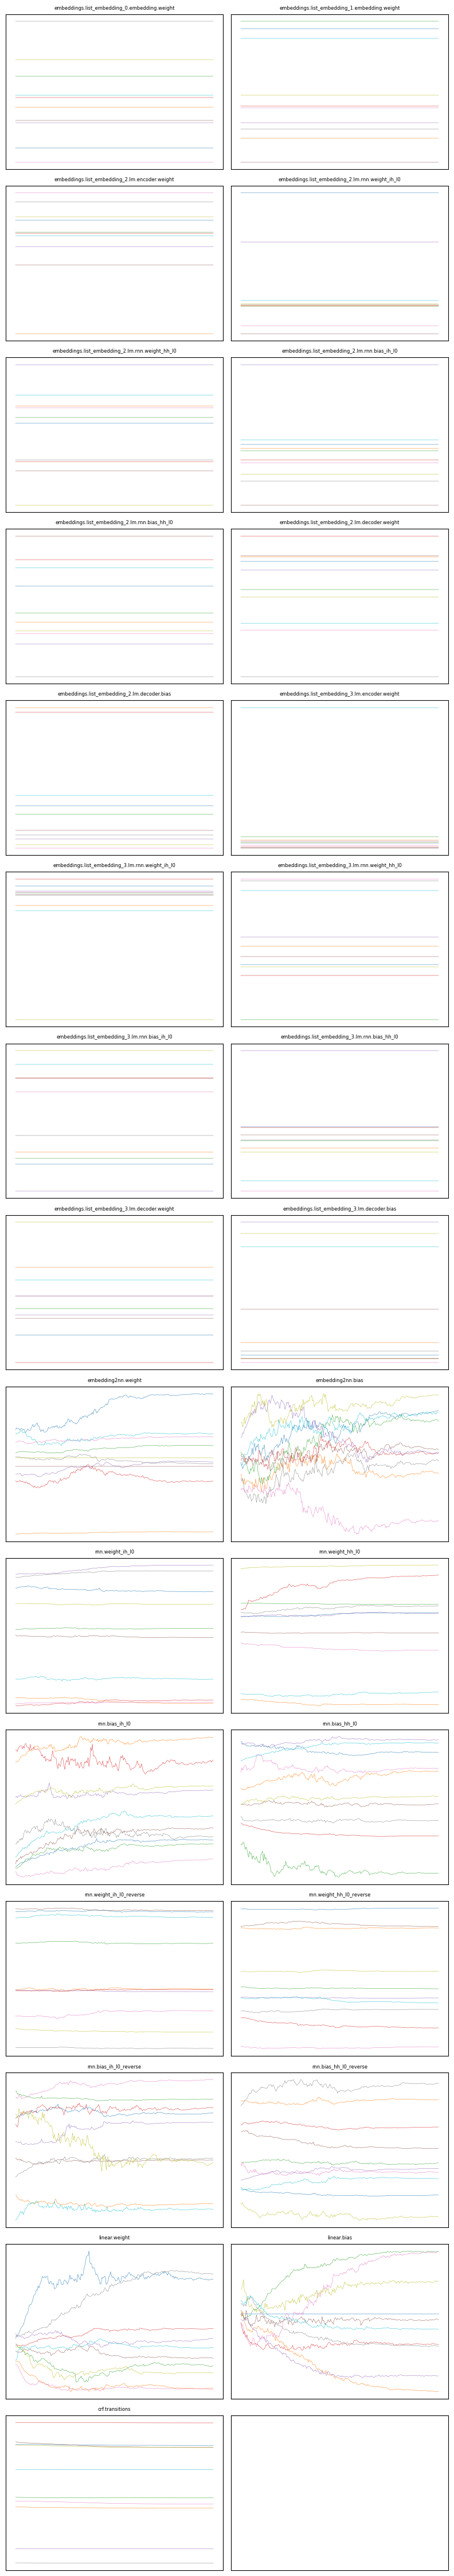

In [15]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')